In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import csv, sqlite3

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan 
from statsmodels.stats.diagnostic import acorr_breusch_godfrey 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score




In [3]:
df = pd.read_csv('realtor-data.zip.csv')
df_p2 = pd.read_csv('realtor-data.zip.csv')

In [4]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [5]:
df = df.drop(['brokered_by','status','street','zip_code','prev_sold_date'], axis = 1 )

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   price       float64
 1   bed         float64
 2   bath        float64
 3   acre_lot    float64
 4   city        object 
 5   state       object 
 6   house_size  float64
dtypes: float64(5), object(2)
memory usage: 118.9+ MB


In [7]:
df.isnull().sum()

price           1541
bed           481317
bath          511771
acre_lot      325589
city            1407
state              8
house_size    568484
dtype: int64

In [8]:
len(df)

df.head()

,price,bed,bath,acre_lot,city,state,house_size
0,105000.0,3.0,2.0,0.12,Adjuntas,Puerto Rico,920.0
1,80000.0,4.0,2.0,0.08,Adjuntas,Puerto Rico,1527.0
2,67000.0,2.0,1.0,0.15,Juana Diaz,Puerto Rico,748.0
3,145000.0,4.0,2.0,0.10,Ponce,Puerto Rico,1800.0
4,65000.0,6.0,2.0,0.05,Mayaguez,Puerto Rico,NaN


In [9]:
df_cleaned = df.dropna()

In [10]:
len(df_cleaned)

1360390

In [11]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1360390 entries, 0 to 2226381
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   price       1360390 non-null  float64
 1   bed         1360390 non-null  float64
 2   bath        1360390 non-null  float64
 3   acre_lot    1360390 non-null  float64
 4   city        1360390 non-null  object 
 5   state       1360390 non-null  object 
 6   house_size  1360390 non-null  float64
dtypes: float64(5), object(2)
memory usage: 83.0+ MB


In [12]:
los_angeles_rows = df_cleaned[df_cleaned['city'] == 'Los Angeles']
print(los_angeles_rows)



             price  bed  bath  acre_lot         city       state  house_size
1256857   260000.0  3.0   3.0      0.07  Los Angeles  California      1574.0
1256858   439000.0  2.0   1.0      0.10  Los Angeles  California       816.0
1256859   500000.0  2.0   1.0      0.12  Los Angeles  California       886.0
1256861   580000.0  4.0   1.0      0.12  Los Angeles  California      1290.0
1256862   490000.0  2.0   1.0      0.07  Los Angeles  California       864.0
...            ...  ...   ...       ...          ...         ...         ...
2118688  1650000.0  2.0   3.0      6.02  Los Angeles  California      2718.0
2118726  1950000.0  4.0   3.0      0.30  Los Angeles  California      2299.0
2118790  1979000.0  3.0   3.0      2.31  Los Angeles  California      2543.0
2118811   749999.0  3.0   2.0      0.15  Los Angeles  California      1456.0
2118924  1899000.0  3.0   4.0     16.11  Los Angeles  California      3346.0

[7556 rows x 7 columns]


In [13]:
df_cleaned['PriceSegment'] = pd.cut(df_cleaned['price'],bins = [0, 500000, 1000000, 2000000, 5000000, np.inf], 
                                 labels = ['Affordable', 'Mid-range', 'High-end', 'Luxury', 'Ultra-Luxury']
)


city_area = ['New York City','Los Angeles','Chicago']
df_city = df_cleaned[df_cleaned['city'].isin(city_area)]


C:\Users\Dell\AppData\Local\Temp\ipykernel_14532\2743008021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['PriceSegment'] = pd.cut(df_cleaned['price'],bins = [0, 500000, 1000000, 2000000, 5000000, np.inf],


In [14]:
df_city = df_city[['city','state','house_size','bed','bath','price','PriceSegment']]
df_city

,city,state,house_size,bed,bath,price,PriceSegment
45744,New York City,New York,3224.0,5.0,4.0,3500000.0,Luxury
45747,New York City,New York,6100.0,8.0,8.0,7850000.0,Ultra-Luxury
46168,New York City,New York,700.0,1.0,1.0,945000.0,Mid-range
46171,New York City,New York,1868.0,3.0,3.0,4475000.0,Luxury
46220,New York City,New York,4400.0,1.0,2.0,3895000.0,Luxury
...,...,...,...,...,...,...,...
2118688,Los Angeles,California,2718.0,2.0,3.0,1650000.0,High-end
2118726,Los Angeles,California,2299.0,4.0,3.0,1950000.0,High-end
2118790,Los Angeles,California,2543.0,3.0,3.0,1979000.0,High-end
2118811,Los Angeles,California,1456.0,3.0,2.0,749999.0,Mid-range


In [15]:
con = sqlite3.connect('AmericaHouse.db')
cur = con.cursor()

In [16]:
%load_ext sql 

In [17]:
%sql sqlite:///AmericaHouse.db

In [18]:
df_city.to_sql('CityArea',con,if_exists = 'replace',index = False)

14246

In [19]:
%%sql 
SELECT DISTINCT(PriceSegment), COUNT(city)
FROM CityArea
GROUP BY [PriceSegment]


 * sqlite:///AmericaHouse.db
Done.


PriceSegment,COUNT(city)
Affordable,4303
High-end,3363
Luxury,1854
Mid-range,4132
Ultra-Luxury,594


In [20]:
%%sql
WITH MedianPrice AS (
    SELECT 
        city,
        state,
        AVG(price) AS median_price
    FROM (
        SELECT 
            city,
            state,
            price,
            ROW_NUMBER() OVER (PARTITION BY city, state ORDER BY price) AS rn,
            COUNT(*) OVER (PARTITION BY city, state) AS total_count
        FROM CityArea
    )
    WHERE rn IN ((total_count + 1) / 2, (total_count + 2) / 2)  -- Handle both odd and even counts
    GROUP BY city, state
)

SELECT 
    ca.price, 
    ca.PriceSegment, 
    CASE 
        WHEN ca.price < mp.median_price THEN 0 
        ELSE 1 
    END AS expected_segment
FROM CityArea ca
JOIN MedianPrice mp ON ca.city = mp.city AND ca.state = mp.state
WHERE expected_segment <> ca.PriceSegment;




 * sqlite:///AmericaHouse.db
Done.


price,PriceSegment,expected_segment
3500000.0,Luxury,1
7850000.0,Ultra-Luxury,1
945000.0,Mid-range,0
4475000.0,Luxury,1
3895000.0,Luxury,1
8500000.0,Ultra-Luxury,1
1599000.0,High-end,0
765000.0,Mid-range,0
2545000.0,Luxury,1
4100000.0,Luxury,1


In [21]:
%%sql
SELECT 
    city, 
    state, 
    COUNT(*) AS house_count,
    AVG(price) AS avg_price,
    MIN(price) AS min_price,
    MAX(price) AS max_price,
    MIN(house_size) as min_size,
    MAX(house_size) as max_size
FROM CityArea
GROUP BY city, state
ORDER BY avg_price DESC;  -- Sắp xếp theo giá trung bình giảm dần


 * sqlite:///AmericaHouse.db
Done.


city,state,house_count,avg_price,min_price,max_price,min_size,max_size
New York City,New York,1671,3359061.5840813885,180000.0,169000000.0,394.0,29363.0
Los Angeles,California,7556,1885626.1627845422,85000.0,165000000.0,408.0,59071.0
Chicago,Illinois,5019,473491.0597728631,7000.0,18000000.0,504.0,15000.0


In [22]:
%%sql
SELECT 
    city, 
    state, 
    AVG(house_size) AS avg_house_size, 
    MIN(house_size) AS min_house_size,
    MAX(house_size) AS max_house_size
FROM CityArea
GROUP BY city, state
HAVING MIN(house_size) < 394 OR MAX(house_size) > 59071;  -- Ví dụ kích thước tối thiểu và tối đa


 * sqlite:///AmericaHouse.db
Done.


city,state,avg_house_size,min_house_size,max_house_size


In [23]:
%%sql
SELECT DISTINCT(city), COUNT(city) as "Number of Listed City"
FROM CityArea 
GROUP BY city

 * sqlite:///AmericaHouse.db
Done.


city,Number of Listed City
Chicago,5019
Los Angeles,7556
New York City,1671


In [24]:
std = df_city['bed'].std()
std


3.0388179214755793

In [25]:
%%sql

WITH Stats AS (
    -- Calculate the average (mean) and the count of bed values
    SELECT 
        AVG(bed) AS avg_bed,
        COUNT(bed) AS count_bed
    FROM CityArea
),
VarianceCalc AS (
    -- Calculate the variance (sum of squared differences from the mean)
    SELECT 
        SUM((bed - (SELECT avg_bed FROM Stats)) * (bed - (SELECT avg_bed FROM Stats))) / (SELECT count_bed FROM Stats) AS variance
    FROM CityArea
)
SELECT 
    city, 
    state, 
    bed,
    (bed - (SELECT avg_bed FROM Stats)) / (SELECT SQRT(variance) FROM VarianceCalc) AS z_score_bed
FROM CityArea
WHERE ABS((bed - (SELECT avg_bed FROM Stats)) / (SELECT SQRT(variance) FROM VarianceCalc)) > 3  -- Outliers defined as 3 standard deviations away
ORDER BY z_score_bed DESC;


 * sqlite:///AmericaHouse.db
Done.


city,state,bed,z_score_bed
Los Angeles,California,70.0,21.788318670514617
Los Angeles,California,66.0,20.471971162686938
Los Angeles,California,63.0,19.48471053181618
Los Angeles,California,56.0,17.181102393117744
Los Angeles,California,55.0,16.852015516160822
Los Angeles,California,54.0,16.522928639203904
Los Angeles,California,52.0,15.864754885290065
Los Angeles,California,49.0,14.877494254419307
Los Angeles,California,45.0,13.561146746591628
Los Angeles,California,44.0,13.23205986963471


In [26]:
%%sql 
SELECT DISTINCT(city), AVG(price) as AVG_Price
FROM CityArea
GROUP BY city

 * sqlite:///AmericaHouse.db
Done.


city,AVG_Price
Chicago,473491.0597728631
Los Angeles,1885626.1627845422
New York City,3359061.5840813885


In [27]:
%%sql
SELECT 
    price,
    house_size,
    PriceSegment,
    (price / house_size) AS price_per_size
FROM CityArea
WHERE (price / house_size) > 1500;  -- Giả sử giá trên mỗi kích thước quá cao


 * sqlite:///AmericaHouse.db
Done.


price,house_size,PriceSegment,price_per_size
4475000.0,1868.0,Luxury,2395.610278372591
8500000.0,5120.0,Ultra-Luxury,1660.15625
2545000.0,1143.0,Luxury,2226.596675415573
12995000.0,3650.0,Ultra-Luxury,3560.27397260274
6250000.0,2661.0,Ultra-Luxury,2348.741074783916
8995000.0,3520.0,Ultra-Luxury,2555.3977272727275
1973820.0,1165.0,High-end,1694.266094420601
20000000.0,10800.0,Ultra-Luxury,1851.851851851852
25000000.0,6168.0,Ultra-Luxury,4053.177691309987
6499000.0,2692.0,Ultra-Luxury,2414.190193164933


City: $500-1500 / m2

Outskirt, small city: $100-300 / m2

Country: $100 / m2

In [28]:
con.close()

# Phân tích giá nhà tại các khu vực thành phố lớn

In [29]:
stats = df_city.describe()
print("Thống kê mô tả tổng quát cho giá bất động sản")
print(stats.to_string(float_format='{:.2f}'.format))

Thống kê mô tả tổng quát cho giá bất động sản
       house_size      bed     bath        price
count    14246.00 14246.00 14246.00     14246.00
mean      2313.43     3.79     3.07   1560945.87
std       2267.83     3.04     2.88   3673451.02
min        394.00     1.00     1.00      7000.00
25%       1196.25     2.00     2.00    425000.00
50%       1700.00     3.00     2.00    815250.00
75%       2700.00     4.00     4.00   1595000.00
max      59071.00    70.00    74.00 169000000.00


In [30]:
# Độ biến thiên giá theo khu vực
price_variance_by_location = df_city.groupby('state')['price'].var()

print(price_variance_by_location.to_string(float_format='{:.2f}'.format))

state
California   14081527704233.54
Illinois       404666057631.54
New York     42918816811870.14


In [31]:
# Số lượng bất động sản theo khu vực
count_by_city = df['city'].value_counts()
count_by_city

city
Houston                        23862
Chicago                        18238
New York City                  12634
Jacksonville                   11743
Philadelphia                   10449
                               ...  
Angel Ifre                         1
Colfax County Moreno Valley        1
Little Sioux                       1
Trementina                         1
Kahlotus                           1
Name: count, Length: 20098, dtype: int64

In [32]:
# Hệ số biến thiên giá (coeefficient of variation) 
cv = df_city['price'].std() / df_city['price'].mean()
cv

2.3533493973453417

In [33]:
# Độ phân tán giá
price_range = df_city['price'].max() - df_city['price'].min()

price_range

168993000.0

In [34]:
Q1 = df_city['price'].quantile(0.25)
Q3 = df_city['price'].quantile(0.75)

IQR = Q3 - Q1 

outliers = df_city[(df_city['price'] < (Q1 - 1.5 * IQR)) | (df_city['price'] > (Q3 + 1.5 * IQR))]

outliers

,city,state,house_size,bed,bath,price,PriceSegment
45744,New York City,New York,3224.0,5.0,4.0,3500000.0,Luxury
45747,New York City,New York,6100.0,8.0,8.0,7850000.0,Ultra-Luxury
46171,New York City,New York,1868.0,3.0,3.0,4475000.0,Luxury
46220,New York City,New York,4400.0,1.0,2.0,3895000.0,Luxury
46248,New York City,New York,5120.0,6.0,5.0,8500000.0,Ultra-Luxury
...,...,...,...,...,...,...,...
2077017,Los Angeles,California,3135.0,3.0,3.0,3995000.0,Luxury
2077030,Los Angeles,California,5366.0,5.0,6.0,5125000.0,Ultra-Luxury
2077031,Los Angeles,California,3670.0,4.0,4.0,4250000.0,Luxury
2077053,Los Angeles,California,4878.0,5.0,5.0,6795000.0,Ultra-Luxury


In [35]:
# Độ lệch trung bình tuyệt đối (mean absolute deviation)
price_data = df_city['price']
mean_price = price_data.mean()

mad = (price_data - mean_price).abs().mean()

mad


1334611.9408023856

In [36]:
# Tần suất xuất hiện của giá (frequency analysis)
frequency = df_city['PriceSegment'].value_counts()
frequency

PriceSegment
Affordable      4303
Mid-range       4132
High-end        3363
Luxury          1854
Ultra-Luxury     594
Name: count, dtype: int64

In [37]:
# Hệ số tương quan giữa gía và diện tích
corr_price_area = df_city['price'].corr(df_city['house_size'])
corr_price_area

0.6128465599539104

In [38]:
min_value = df_city['price'].min()
min_value

max_value  = df_city['price'].max()
max_value

169000000.0

In [39]:
# Hệ số tương quan giữa giá và phòng ngủ
corr_price_bed = df_city['price'].corr(df_city['bed'])
corr_price_bed

0.25233049449313194

In [40]:
# Giá trung bình từng vùng
mean_price_by_location = df_city.groupby('state')['price'].mean()
print(mean_price_by_location.to_string(float_format='{:.2f}'.format))

state
California   1885626.16
Illinois      473491.06
New York     3359061.58


In [41]:
outliers_upper = df_city[df_city['price'] > (Q3 + 1.5 * IQR)]
outliers_lower = df_city[df_city['price'] < (Q1 - 1.5 * IQR)]
print(f'Outliers upper : {outliers_upper}')
print(f'Outliers lower : {outliers_lower}')

Outliers upper :                   city       state  house_size  bed  bath      price  \
45744    New York City    New York      3224.0  5.0   4.0  3500000.0   
45747    New York City    New York      6100.0  8.0   8.0  7850000.0   
46171    New York City    New York      1868.0  3.0   3.0  4475000.0   
46220    New York City    New York      4400.0  1.0   2.0  3895000.0   
46248    New York City    New York      5120.0  6.0   5.0  8500000.0   
...                ...         ...         ...  ...   ...        ...   
2077017    Los Angeles  California      3135.0  3.0   3.0  3995000.0   
2077030    Los Angeles  California      5366.0  5.0   6.0  5125000.0   
2077031    Los Angeles  California      3670.0  4.0   4.0  4250000.0   
2077053    Los Angeles  California      4878.0  5.0   5.0  6795000.0   
2077300    Los Angeles  California      2848.0  3.0   3.0  3795000.0   

         PriceSegment  
45744          Luxury  
45747    Ultra-Luxury  
46171          Luxury  
46220          Luxury 

In [42]:
price_quantiles = df_city['price'].quantile([0.25,0.5,0.7,1.0])
price_quantiles

0.25       425000.0
0.50       815250.0
0.70      1385000.0
1.00    169000000.0
Name: price, dtype: float64

# Data Visualization

In [43]:
df_city.head()

,city,state,house_size,bed,bath,price,PriceSegment
45744,New York City,New York,3224.0,5.0,4.0,3500000.0,Luxury
45747,New York City,New York,6100.0,8.0,8.0,7850000.0,Ultra-Luxury
46168,New York City,New York,700.0,1.0,1.0,945000.0,Mid-range
46171,New York City,New York,1868.0,3.0,3.0,4475000.0,Luxury
46220,New York City,New York,4400.0,1.0,2.0,3895000.0,Luxury


Text(0, 0.5, 'Giá BĐS trung bình (USD')

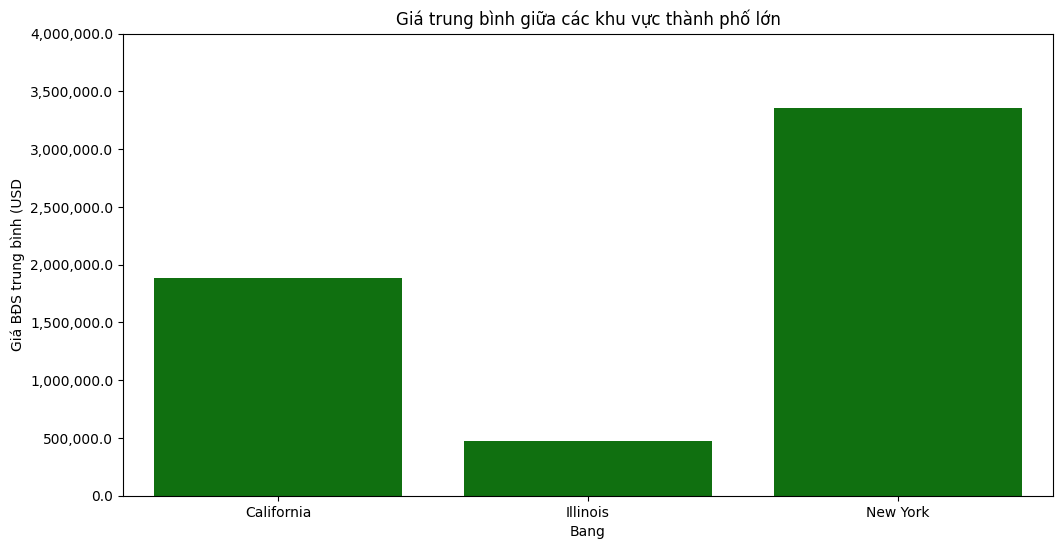

In [44]:
average_state = df_city.groupby('state')['price'].mean()

plt.figure(figsize =(12,6))
sns.barplot(x =average_state.index, y =average_state.values, color = 'green')

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/(1):,.1f}' for tick in yticks])

plt.title('Giá trung bình giữa các khu vực thành phố lớn')
plt.xlabel('Bang')
plt.ylabel('Giá BĐS trung bình (USD')

Text(0, 0.5, 'Nghìn USD')

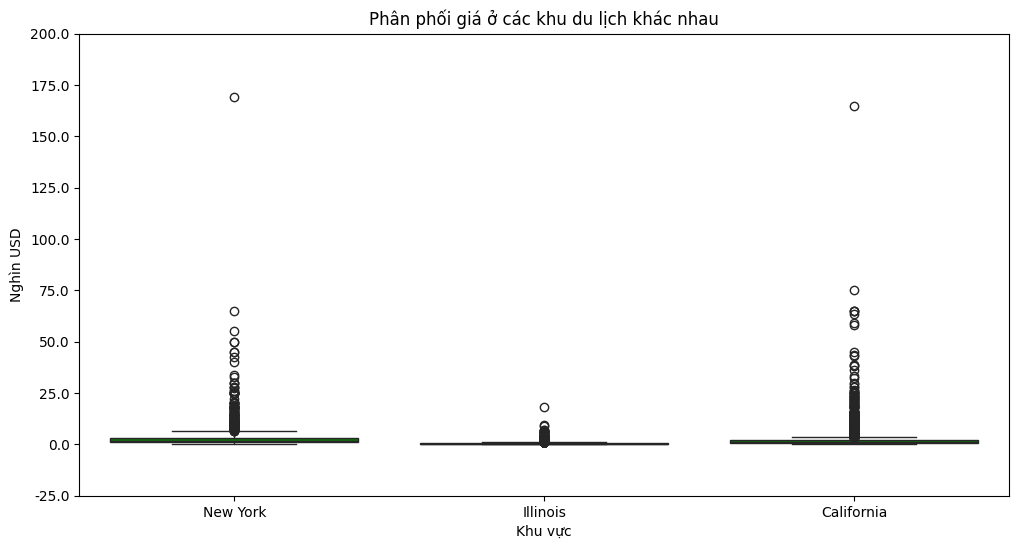

In [45]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'state', y = 'price', data = df_city, color = 'Green')

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/(10**6):,.1f}' for tick in yticks])


plt.title('Phân phối giá ở các khu du lịch khác nhau')
plt.xlabel('Khu vực')
plt.ylabel('Nghìn USD')

Text(0, 0.5, 'Nghìn USD')

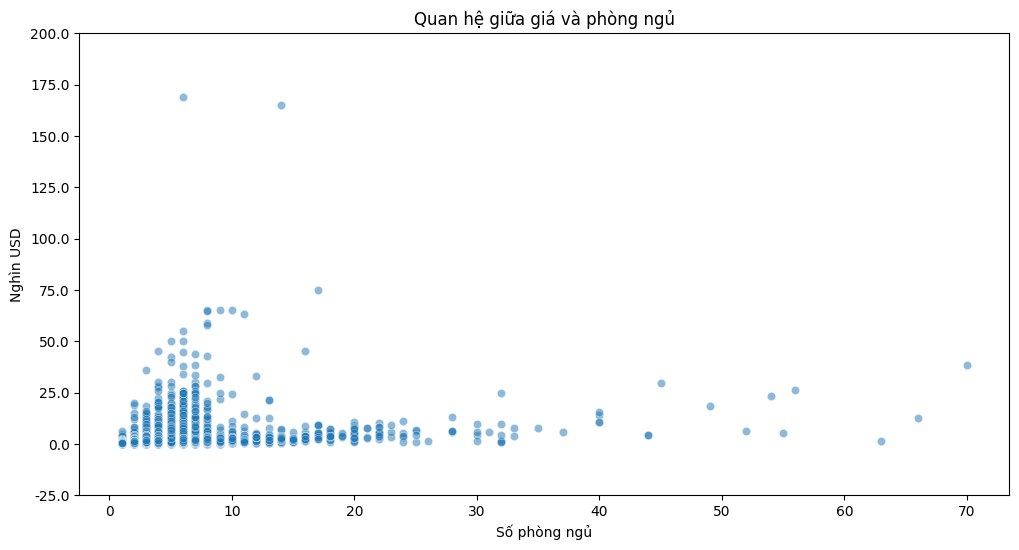

In [46]:
plt.figure(figsize = (12,6))
sns.scatterplot(x='bed', y='price', data=df_city, alpha=0.5)

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/(10**(6)):,.1f}' for tick in yticks])

plt.title('Quan hệ giữa giá và phòng ngủ')

plt.xlabel('Số phòng ngủ')
plt.ylabel('Nghìn USD')

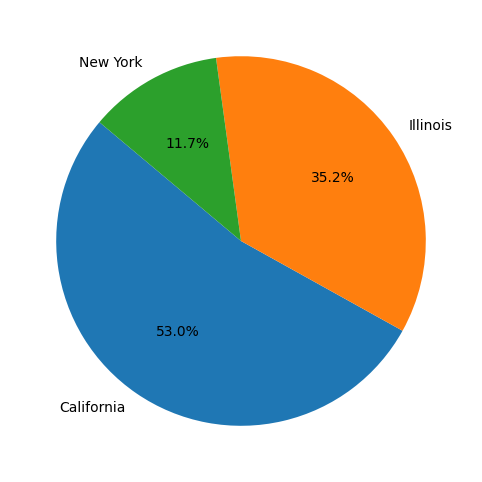

In [47]:
real_estate_counts = df_city['state'].value_counts()

plt.figure(figsize = (12,6))
plt.pie(real_estate_counts, labels = real_estate_counts.index, autopct ='%1.1f%%', startangle = 140);

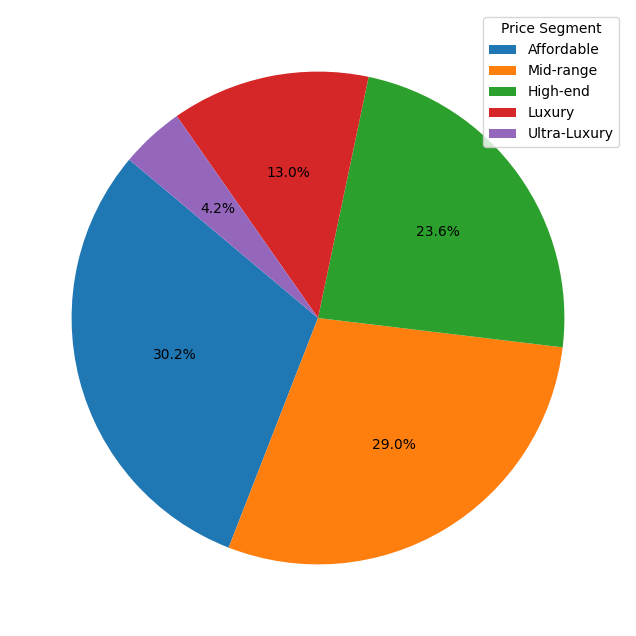

In [48]:
price_segment_count = df_city['PriceSegment'].value_counts()

plt.figure(figsize=(10,8))
plt.pie(price_segment_count, autopct='%1.1f%%', startangle=140)

plt.legend(price_segment_count.index, title="Price Segment", loc="best")

plt.show()


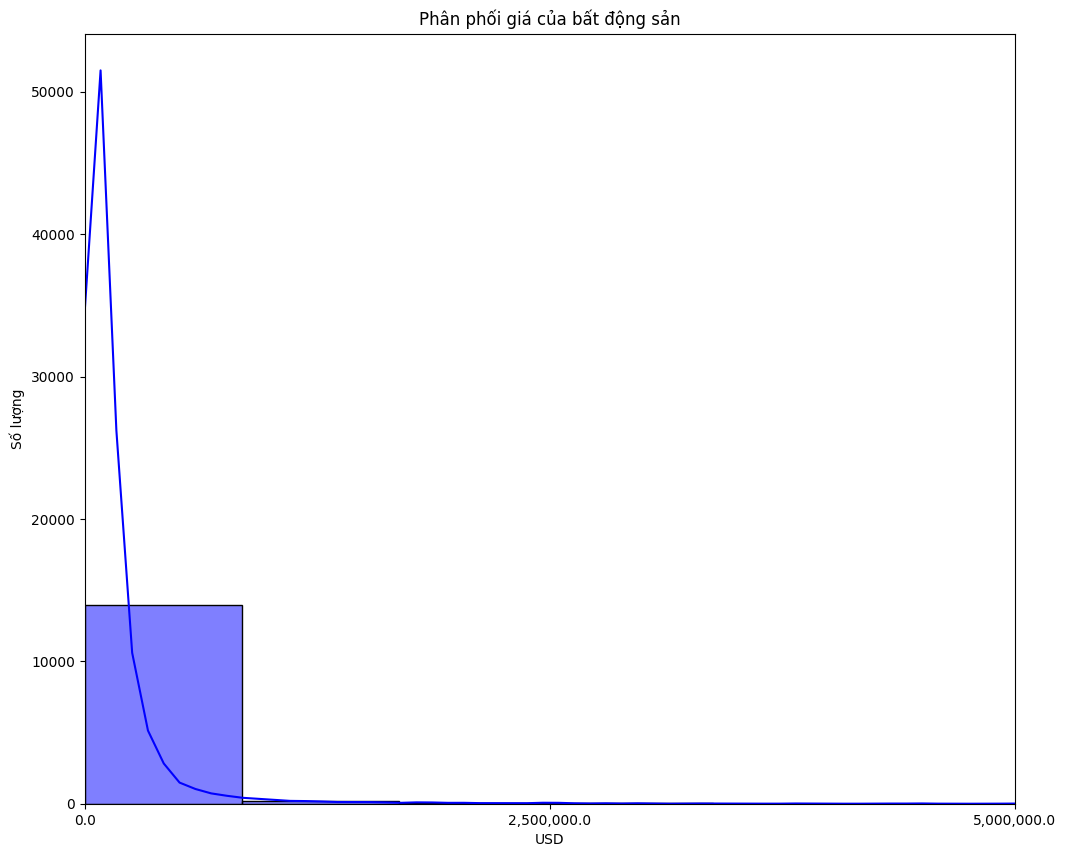

In [49]:
plt.figure(figsize=(12, 10))
sns.histplot(df_city['price'], kde=True, color='blue',bins = 20)

xticks = plt.xticks()[0]
plt.xticks(xticks, labels=[f'{float(tick)/(10*(1)):,.1f}' for tick in xticks])
plt.xlim(0)
plt.xlim(0,50000000)

plt.title('Phân phối giá của bất động sản')
plt.xlabel('USD')
plt.ylabel('Số lượng');

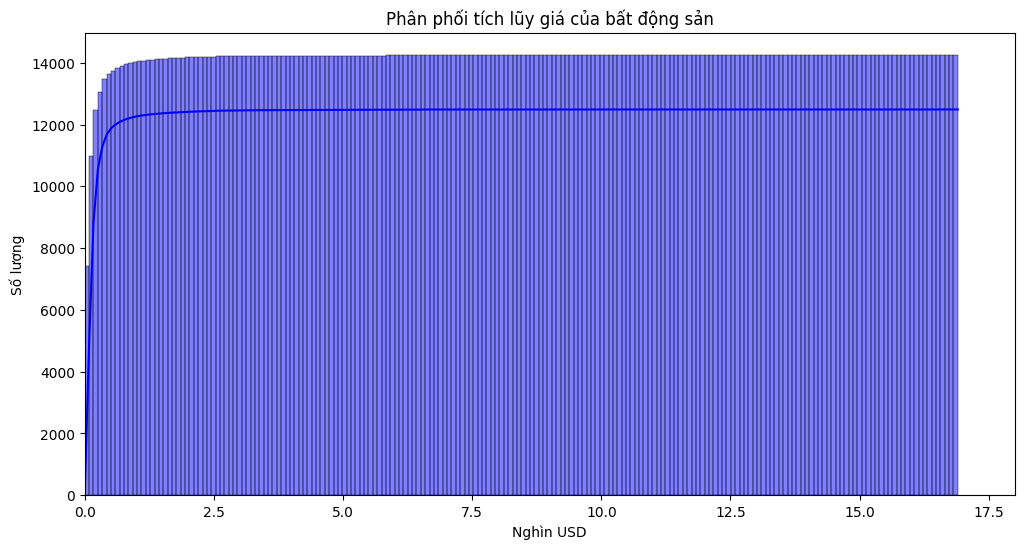

In [50]:
plt.figure(figsize=(12, 6))
sns.histplot(df_city['price'], kde=True, color='blue', cumulative=True, bins=200)

xticks = plt.xticks()[0]
plt.xticks(xticks, labels=[f'{float(tick)/(10*(10**6)):,.1f}' for tick in xticks])
plt.xlim(0,180000000)

plt.title('Phân phối tích lũy giá của bất động sản')
plt.xlabel('Nghìn USD')
plt.ylabel('Số lượng');

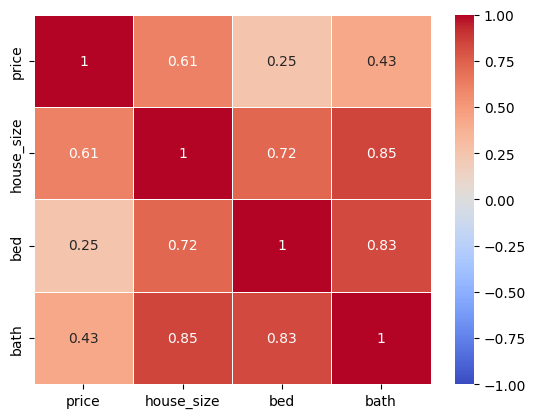

In [51]:
# Heatmap: Tương quan giữa giá và các yếu tố khác.
corr_matrix = df_city[['price', 'house_size','bed', 'bath']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5);

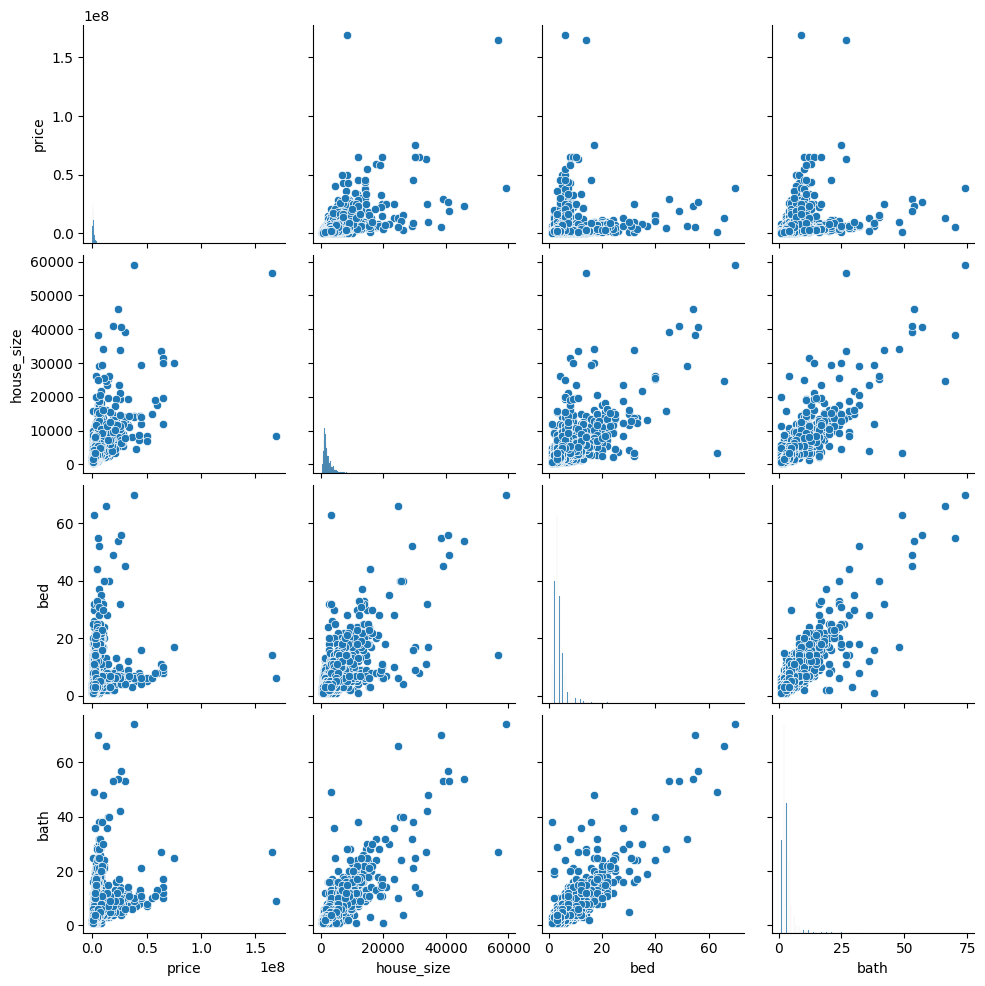

In [52]:
sns.pairplot(df_city[['price', 'house_size','bed', 'bath']]);

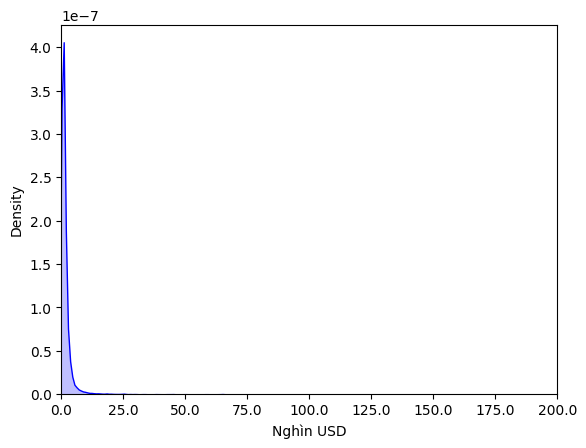

In [53]:
sns.kdeplot(df_city['price'], color='blue', fill=True)

xticks = plt.xticks()[0]
plt.xticks(xticks, labels=[f'{float(tick)/(10**(6)):,.1f}' for tick in xticks])
plt.xlim(0)

plt.xlabel('Nghìn USD');

''

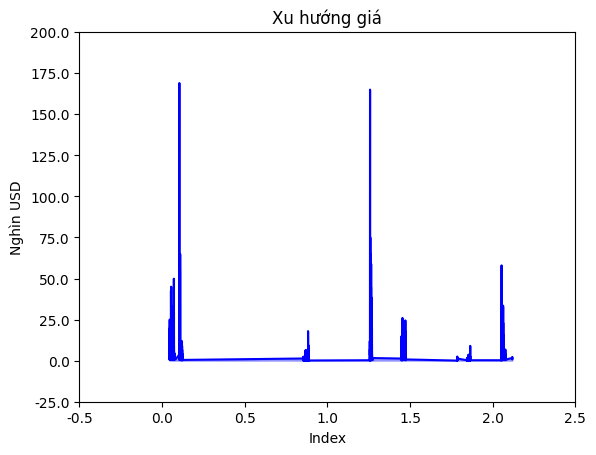

In [54]:
sns.lineplot(data=df_city['price'], color='blue')
plt.fill_between(df_city.index, df_city['price'], color='blue', alpha=0.3)
xticks = plt.xticks()[0]
plt.xticks(xticks, labels=[f'{float(tick)/(10**(6)):,.1f}' for tick in xticks])
yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/(10**(6)):,.1f}' for tick in yticks])

plt.title('Xu hướng giá')
plt.xlabel('Index')
plt.ylabel('Nghìn USD')
;


''

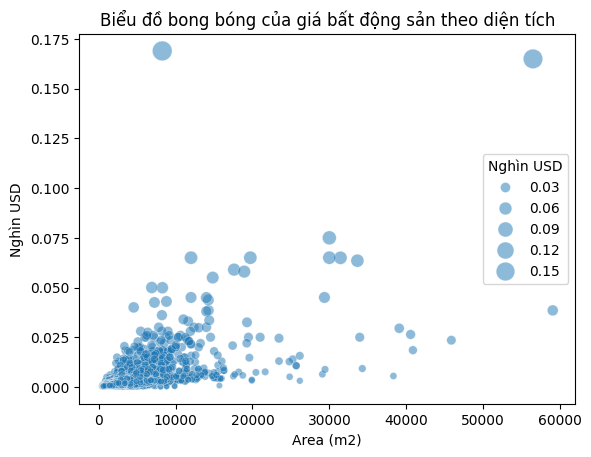

In [55]:
price_billion = df_city['price'].apply(lambda x: x/(10**9))

sns.scatterplot(x=df_city.house_size, y=price_billion, size=price_billion, sizes=(20, 200), alpha=0.5)

plt.title('Biểu đồ bong bóng của giá bất động sản theo diện tích')
plt.xlabel('Area (m2)')
plt.ylabel('Nghìn USD')

plt.legend(title='Nghìn USD', fontsize='10')

;

In [56]:
df_p2[(df_p2['prev_sold_date']=='3019-04-02')]
# find the bad date index
bad_date_index = df_p2[(df_p2['prev_sold_date']=='3019-04-02')].index
bad_date_index
# rewrite using .loc
df_p2.loc[bad_date_index, 'prev_sold_date'] = '2019-04-02'
df_p2[(df_p2['prev_sold_date']=='3019-04-02')]
df_p2['prev_sold_date'] = pd.to_datetime(df_p2['prev_sold_date'])


In [57]:
df_p2_year_sold = df_p2['prev_sold_date'].dt.year.to_frame(name='year_sold')
df_p2_year_sold.dropna(inplace=True)
year_counts = df_p2_year_sold['year_sold'].value_counts().sort_index()

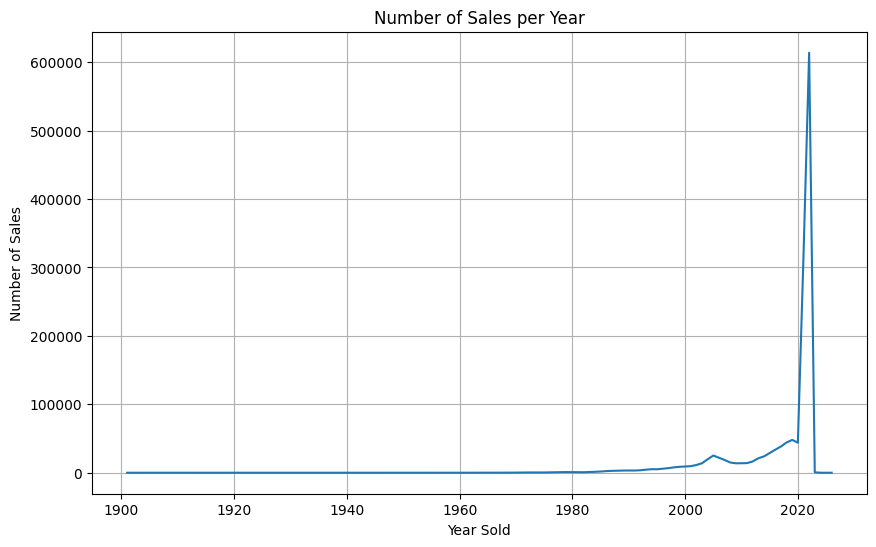

In [58]:
year_counts.plot(kind='line', figsize=(10, 6))
plt.title('Number of Sales per Year')
plt.xlabel('Year Sold')
plt.ylabel('Number of Sales')
plt.grid(True)
plt.show()

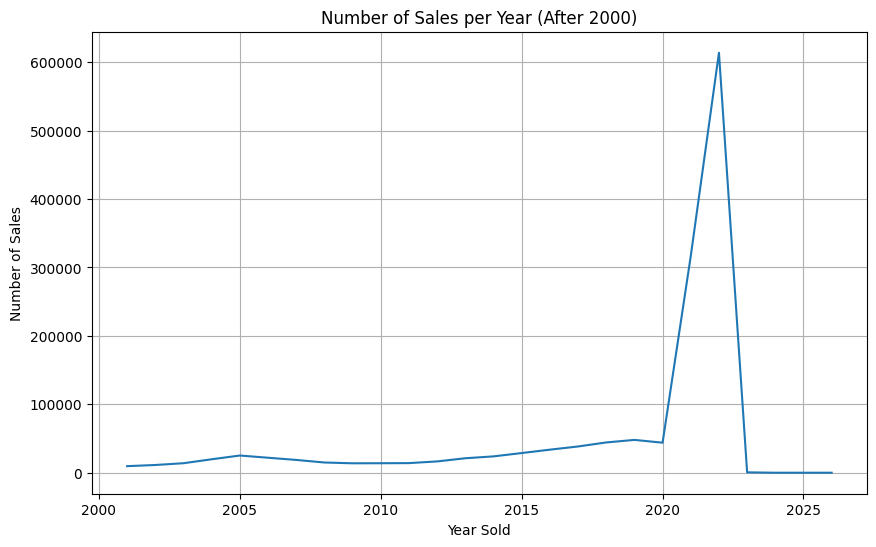

In [59]:
df_after_2000 = df_p2_year_sold[df_p2_year_sold['year_sold'] > 2000]
year_counts_after_2000 = df_after_2000['year_sold'].value_counts().sort_index()

# Plot the line plot
year_counts_after_2000.plot(kind='line', figsize=(10, 6))
plt.title('Number of Sales per Year (After 2000)')
plt.xlabel('Year Sold')
plt.ylabel('Number of Sales')
plt.grid(True)
plt.show()

In [60]:
# Huấn luyện mô hình
X = df_city[['house_size', 'bed', 'bath']]
Y = df_city[['price']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, Y_train)
price_predictions = model.predict(X_test)




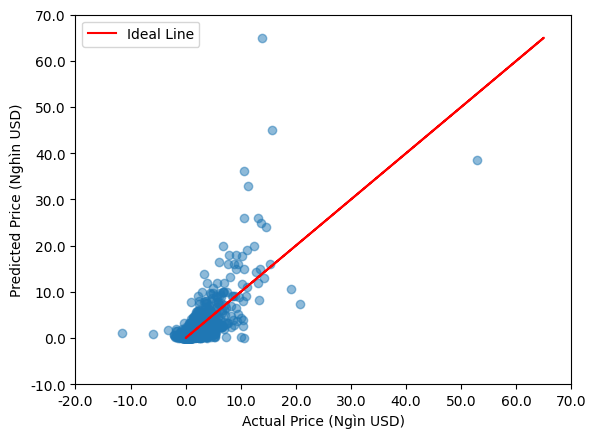

In [61]:
plt.scatter(x=price_predictions, y=Y_test.values, alpha=0.5)
plt.plot(Y_test.values, Y_test.values, color='red', label='Ideal Line')

xticks = plt.xticks()[0]
plt.xticks(xticks, labels=[f'{float(tick)/(10**(6)):,.1f}' for tick in xticks])
yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/(10**(6)):,.1f}' for tick in yticks])

plt.ylabel('Predicted Price (Nghìn USD)')
plt.xlabel('Actual Price (Ngìn USD)')
plt.legend()




In [62]:
X = df_cleaned[['house_size','bed','bath']]
y = df_cleaned['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Predicting
y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R² Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 1144311424502.0713
R² Score: 0.16453956478522025


In [67]:
X = df_cleaned[['house_size', 'bed', 'bath']]
y = df_cleaned['price']

X = np.column_stack((np.ones(X.shape[0]), X))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')  # R-squared

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared (on test set): {r2}")
print(f"MSE (on test set): {mse}")
print(f"Cross-validated R-squared: {np.mean(cv_results)}")


R-squared (on test set): 0.16453956478521847
MSE (on test set): 1144311424502.0737
Cross-validated R-squared: 0.1407222229000423


In [68]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"R-squared with Lasso Regression: {r2_lasso}")


R-squared with Lasso Regression: 0.16453957580416934


In [69]:
from sklearn.covariance import EllipticEnvelope

outlier_detector = EllipticEnvelope(contamination=0.05)
outliers = outlier_detector.fit_predict(X)

X_cleaned = X[outliers == 1]
y_cleaned = y[outliers == 1]

X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2_cleaned = r2_score(y_test, y_pred)
print(f"R-squared after outlier removal: {r2_cleaned}")


R-squared after outlier removal: 0.002607496047858038


In [70]:
from sklearn.feature_selection import RFE

selector = RFE(estimator=LinearRegression(), n_features_to_select=3)
selector = selector.fit(X_train, y_train)

X_train_rfe = selector.transform(X_train)
X_test_rfe = selector.transform(X_test)

model.fit(X_train_rfe, y_train)
y_pred_rfe = model.predict(X_test_rfe)

r2_rfe = r2_score(y_test, y_pred_rfe)
print(f"R-squared after RFE: {r2_rfe}")


R-squared after RFE: 0.002607496047858038


In [71]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"R-squared with Gradient Boosting: {r2_gbr}")


R-squared with Gradient Boosting: 0.002848538119976207
